In [1]:
import pygplates
import pygmt
#import pandas as pd
#import numpy as np
#import geopandas as gpd

%matplotlib inline
%load_ext autoreload
%autoreload 2

print(pygplates.__version__)

from gprm.datasets import Reconstructions
from gprm.utils.create_gpml import gdf2gpml, gpml2gdf


0.36.0


In [2]:
M2019 = Reconstructions.fetch_Muller2019()


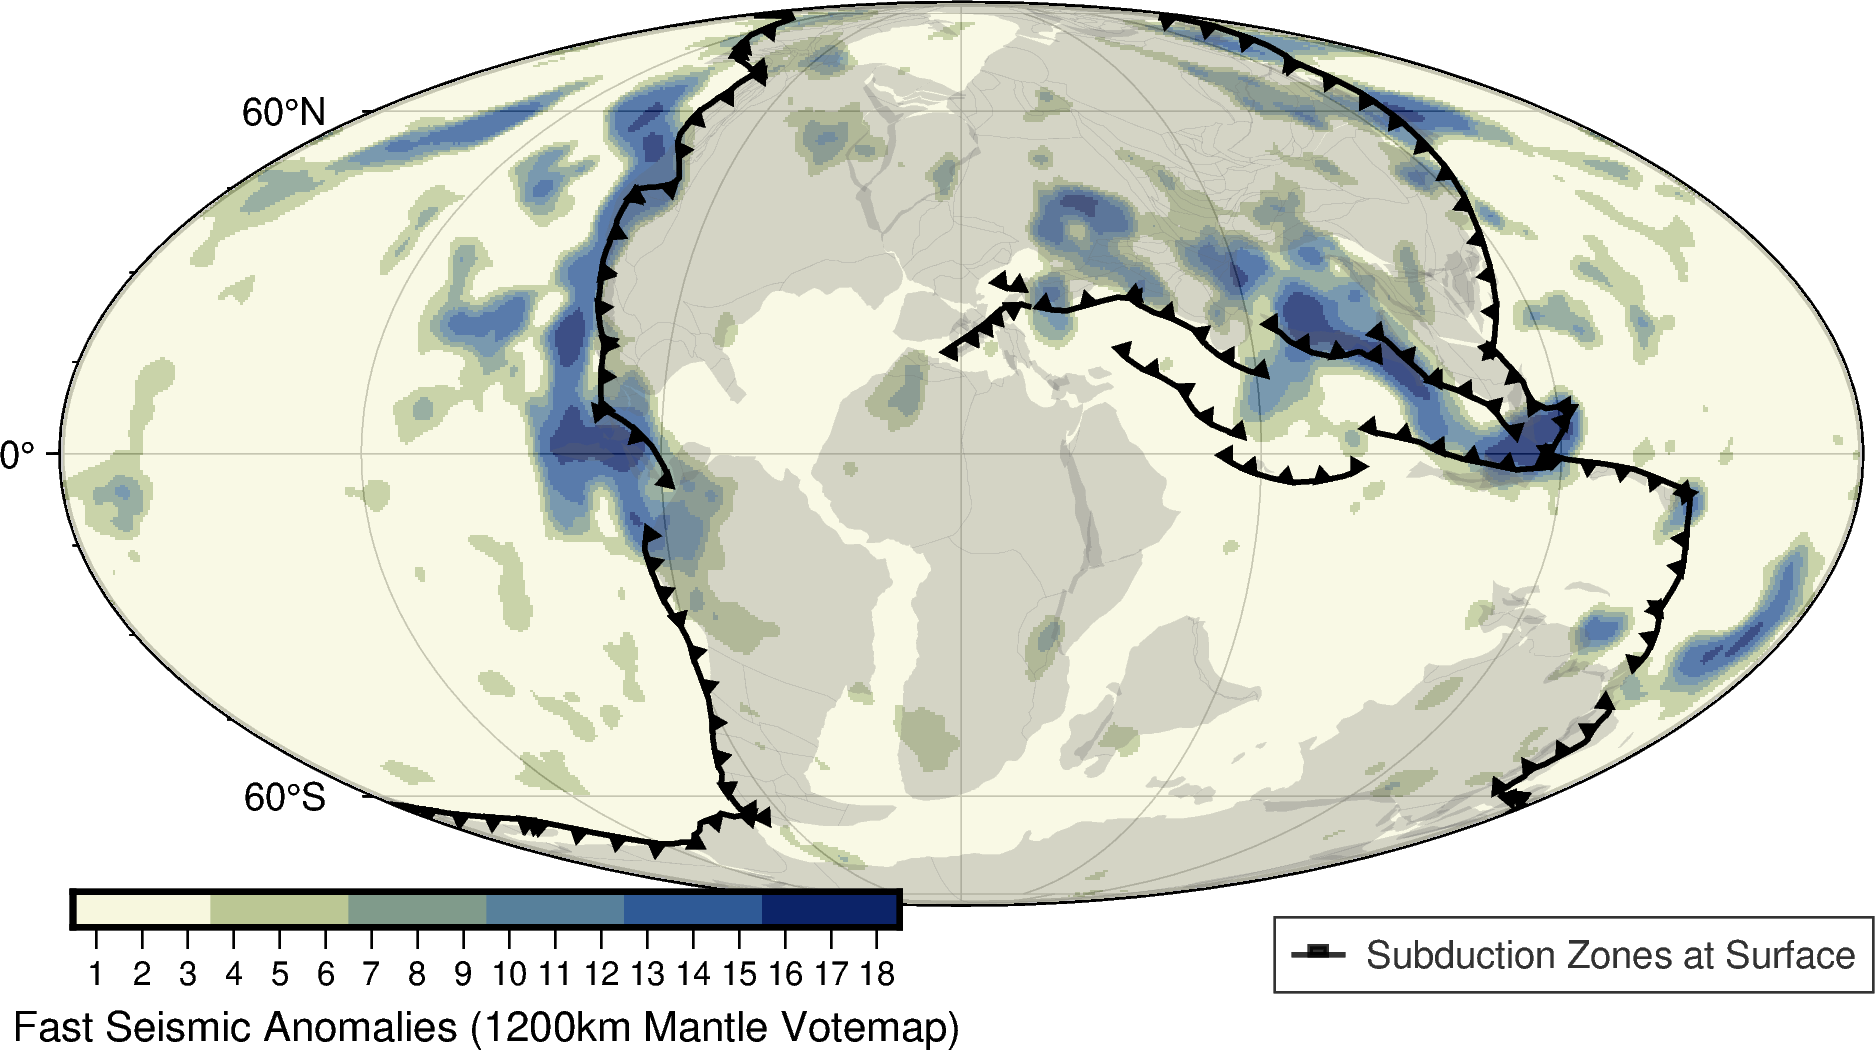

In [18]:

reconstruction_time = 100.

votemap = pygmt.xyz2grd('../data/SubMachine_votemap_depth_slice_1200.txt',
                        region='d', spacing='0.5d')
votemap_filt = pygmt.grdfilter(grid=votemap, distance=2, filter='g500', coltypes='g')

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')

pygmt.makecpt(cmap='SCM/davos', series=[0.5,18.5,3], background='o',reverse=True)
fig.grdimage(grid=votemap_filt, cmap=True, transparency=20)


M2019.polygon_snapshot('continents', reconstruction_time).plot(fig, transparency=75, pen=None, color='gray40')

reconstructed_plates = M2019.plate_snapshot(reconstruction_time)
reconstructed_plates.plot_subduction_zones(fig, pen='1.2p,black', gap=9, size=3, label='Subduction Zones at Surface')

fig.legend(transparency=20, position='JBR+jBR+o-0.1c/-0.75c', box='+gwhite+p0.5p')
with pygmt.config(FONT_ANNOT_PRIMARY='8p', FONT_LABEL='10p'):
    fig.colorbar(position='JBL+jBL+o0.1c/-0.2c+w7.0c/0.3c+h', frame=['xa1+lFast Seismic Anomalies (1200km Mantle Votemap)'])

fig.savefig('./slab_fitting.pdf', dpi=300)
fig.show(width=1000)
